# Titanic Data Science Solutions

## 작업 과정

우리가 머신 러닝을 푸는 과정은 다음의 7가지 과정을 거치게 된다.

1. 문제 정의
2. 훈련 데이터와 테스트 데이터 획득
3. 데이터 준비 및 정제
4. 데이터 분석, 패턴 파악
5. 모델 생성 및 예측
6. 시각화 및 모델 개선
7. 결과 제출

## 1. 문제 정의

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

=> 주어진 훈련 데이터를 가지고 타이타닉에 탑승한 승객의 생존 여부를 예측할 수 있는 머신 러닝 모델을 만들어라.

Workflow goals
The data science solutions workflow solves for seven major goals.

**Classifying**: 주어진 훈련 데이터를 잘 분류. 해당 feature에 내포되어 있는 의미를 이해하고 다른 feature과의 상관관계를 이해해야 한다.

**Correlating**: 우리의 목표에 어떤 feature가 가장 영향을 많이 끼치는가? 우리의 목표와 feature 사이에 어떤 상관관계가 있는가? feature의 값이 바뀜으로 우리의 목표값도 바뀌는가? 특정 feature들 사이의 상관관계를 정의할 수 있다면 이후의 작업에도 많은 도움이 된다. 

**Converting**: 모델링을 위해, 훈련 데이터를 모두 수치화해야 한다(Converted to numerical equivalent values). 컴퓨터는 text 데이터보다 numerical 데이터를 더 편해한다.

**Completing**: 각 feature 내에 missing value가 있는지 확인하고, 최대한 missing value가 없어야 한다.

**Correcting**: 주어진 훈련 데이터를 분석하면서 부정확한 값들(outlier)이 있다면 고치거나 제외하는 작업도 필요하다. 또한, 목표에 별 도움이 안되는 feature들이나 결과를 많이 왜곡시키는 feature들은 버리는 방법도 있다.

**Creating**: 주어진 feature들의 상관관계를 가지고 새로운 feature를 만들어 모델 학습에 사용

**Charting**: 각 데이터에 적합한 시각화 도구 사용

In [39]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\PythonWorkSpace\\Kaggle\\Titanic'

## 2. 훈련 데이터 및 테스트 데이터 획득

In [41]:
# 상대 경로로 데이터 불러오기
# ../ : 상위 폴더, ./ : 하위 폴더
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

# 데이터에 어떠한 변형을 가하면 두 데이터 모두에 해주어야 하기 때문에 묶어놓음
combine = [train_df, test_df]

## 3. 데이터 분석

**Which features are available in the dataset?**

In [42]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

+ categorical: Sex, Embarked
+ categorical and ordinal: Pclass
+ Numerical: Age, Fare, SibSp, Parch

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


categorical(범주형, 기준에 따라 분류가 되는)한 feature과 numerical한 feature 분류

+ categorical: Survived, Sex, Embarked, Pclass
+ numerical: Age, Fare (Continuous) | SibSp, Parch (Discrete)
+ mixed: Ticket (numeric + alphanumeric), Cabin(alphanumeric)

각 feature마다 적합한 plot이 다르다

**Which features may contain errors or typos?**
+ Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**
-> Correcting 필요

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ Age, Cabin, Embarked 에 NULL 또는 empty 값들 존재 
+ Numerical한 데이터와 String 데이터가 섞여있음

In [45]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Numerical feature의 분포 훑어보기** (Age, Fare, SibSp, Parch)

`describe()`의 `percentiles=`를 변화시켜가며 값이 변하는 경계점 확인

+ Survived는 categorical feature로 0과 1을 가짐
+ Survived의 mean이 0.38 -> 약 38%의 생존률
+ Parch의 75%가 0 -> 대부분의 사람들이 부모님 또는 아이들 없이 탑승
+ SibSp의 50%가 0, 69%가 1 -> 약 30%의 사람들이 배우자 또는 형제자매들과 탑승
+ Fare의 최대최소 격차가 큼 -> 분포가 다양할 듯
+ 가장 나이가 많으신 승객이 80살

In [46]:
train_df.describe(include='O')     # 문자열이 포함된 열 출력

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thomas, Master. Assad Alexander",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [47]:
train_df.describe(percentiles=[.61, .62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Categorical feature의 분포 훑어보기** (Survived, Sex, Embarked, Pclass)

+ 이름은 모두 unique
+ Sex는 두 가지 variable. male이 female보다 많음
+ Cabin은 짐칸인 것 같은데 승객끼리 중복되는 값들이 존재(unique != count) => Cabin을 같이 쓰는 승객들도 존재
+ Embarked(승선한 항구)는 3가지 variable 존재. S 에서 가장 많이 탑승
+ Ticket도 승객끼리 중복되는 값 존재.
 

**Assumptions based on data analysis**

**Correlating**
각 feature과 Survival의 상관관계 분석

**Completing**
: 각 featuire의 missing value 확인

1. Age feature의 missing value complete
2. Embarked feature의 missing value complete

**Correcting**
: feature들 필터링. 필요 없을 것 같은 feature들 drop

1. Ticket, Name, PassengerId drop -> 상식적으로 생각해도 Survival과 그리 관계 없을 것 같은 feature들 
2. Cabin도 drop -> null value가 너무 많음. Survival과 그리 관계 없을 듯

**Creating**
: 새로운 feature 생성

1. Parch, SibSp를 합치면 해당 승객의 가족의 수-> 하나로 묶어 간편하게 처리
2. Name에서 호칭 추출
3. Fare의 range

**Classifying**
세 가지의 가정을 기반으로 data analysis 진행
1. 여자가 생존할 확률이 더 높음
2. 나이가 어릴 수록 생존할 확률이 높음
3. 좋은 좌석에 탑승 했을 수록 생존할 확률이 더 높음

모든 feature들 중 correctinig 과정에서 제외한 feature들을 배제하고 나머지 feature들에 대해 correlating 과정 진행.

In [48]:
# Sex와 Survived의 관계
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [49]:
# Pclass와 Survived의 관계
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


위의 두 feature는 classifying 작업에서 유추한 가정과 동일. 

**Correlating numerical features**

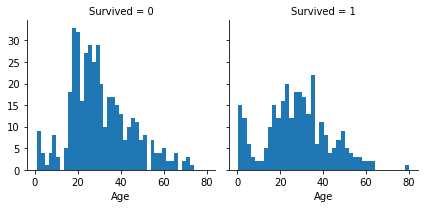

In [50]:
# Age와 Survived의 관계

# seaborn에서 도화지를 준비하는 방법
# 지정한 column에 따라 자동으로 도화지가 나뉘어짐
g = sns.FacetGrid(train_df, col='Survived')   
g.map(plt.hist, 'Age', bins=40)

위 그래프를 보면
+ 영유아들(0~10세)의 생존률이 높음
+ 가장 나이가 많으신 분도 생존함
+ 탑승객 중 청년들(15~30세)의 수가 가장 많으며 이에 반해 생존률이 낮음

**Decisions**
+ Age는 Survival의 여부를 예측하는데 중요한 feature
+ 데이터가 연속적이어서 나이대별로 Survival을 보기가 어려움
+ 우리가 보통 얘기할 때 '몇 살의 생존률이 높다' 라고 얘기하기 보다는 '몇 대의 생존률이 높다(10대의 생존률이 높다)'라고 이야기 함. -> **Age feature의 categorizing 작업이 필요** -> **Create new feature**

**Correlating numerical and ordinal(서수의) features**

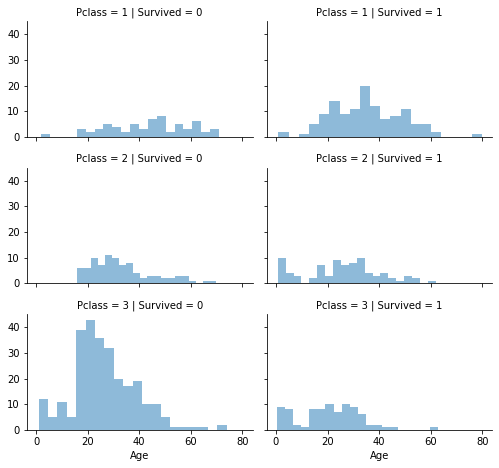

In [51]:
# Pclass와 Survived의 관계
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)

위 그래프들은 row를 Age로 두면서 각 Pclass마다 생존한 사람과 그렇지 않은 사람들의 분포를 히스토그램으로 나타낸 것

그래프들을 분석해보면
+ Pclass가 높을 수록 생존한 사람들이 많음
+ Pclass=2와 Pclass=3에 있는 영유아들은 거의 다 생존
+ Pclass=3에 사람들이 가장 많지만 생존한 사람들은 적음

**Decisions**
+ Assumptions #2와 #3를 잘 설명해주는 그래프 -> 모델 학습에 Pclass 고려

**Correlating categorical features**

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


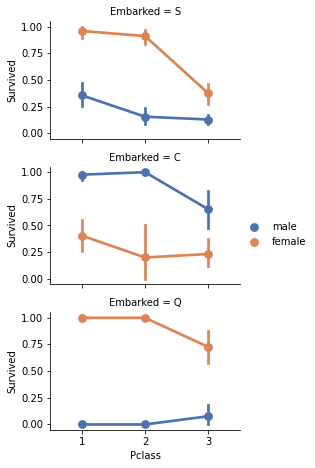

In [52]:
# Sex, Embarked, Survived를 묶어서 관계 확인
g = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

+ 여성 승객이 남성 승객보다 생존률이 높음
+ 'Embarked=C' 에서만 남성의 생존률이 여성보다 높음 -> correlation btw Pclass and Embarked?
+ 그래프 분석 잘 모르겠음

**Correlating categorical and numerical features**

Embarked(categorical), Sex(categorical), Fare(numeric), with Survived(categorical numeric)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


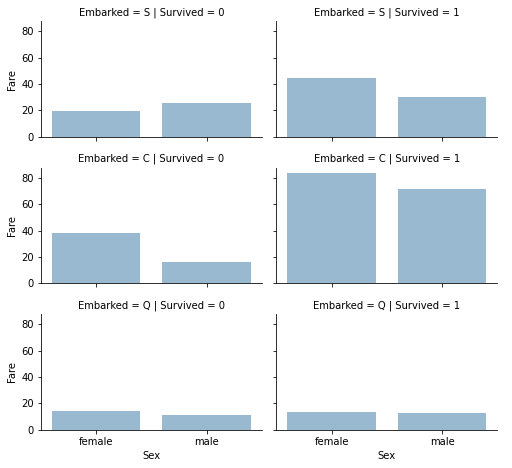

In [53]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

+ Fare가 높을 수록 생존률도 높음
+ C에서의 생존률이 가장 높음

## Wrangle data

**Correcting by dropping features**

Cabin, Ticket feature drop

In [54]:
# 사용하지 않는 cabin, ticket feature drop
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

**Creating new feature extracting from existing**

이름과 생존률 간의 관계 -> 이름에 있는 호칭을 추출하여 새로운 feature를 만듦

In [55]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.')

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**빈도 수가 적은 Title들은 더 common한 Title들로 묶거나 따로 분류**

In [56]:
train_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
train_df['Title'].replace('Mlle', 'Miss', inplace=True)
train_df['Title'].replace('Ms', 'Miss', inplace=True)
train_df['Title'].replace('Mme', 'Mrs', inplace=True)

test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
test_df['Title'].replace('Mlle', 'Miss', inplace=True)
test_df['Title'].replace('Ms', 'Miss', inplace=True)
test_df['Title'].replace('Mme', 'Mrs', inplace=True)
    
# title에 따른 생존률 표로 도식화
train_df[['Title', 'Survived']].groupby(['Title'], as_index=True).mean()

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


**categorical로 바꾼 것을 ordinal하게 바꿈**

In [57]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


**Name feature drop**

In [58]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [60]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [61]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Completing a numerical continuous feature**

Age feature에 대하여 작업. missing value나 null value를 없애는 작업

1. 랜덤 숫자로 채우기
2. 상관관계가 있는 다른 feature로 missing value를 예측하여 채우기. 여기서는 Pclass와 Sex의 상관관계로 채움. Pclass==1&Sex==0의 median ...
3. 1과 2의 방법을 합쳐 평균과 표준편차 내에서 랜덤 숫자로 채우기

1, 3은 랜덤 숫자이기 때문에 노이즈 발생 가능성 존재. 2번으로 작업 진행 

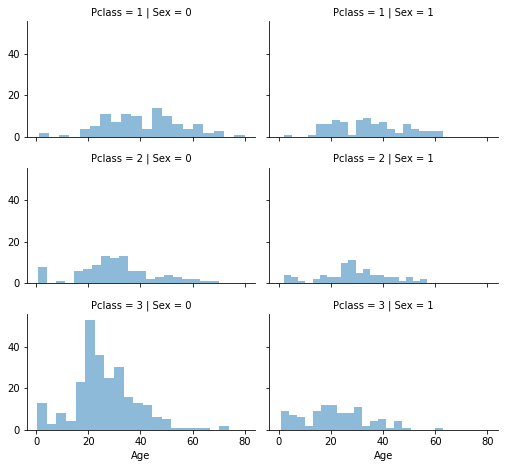

In [62]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

In [63]:
guess_ages = np.zeros((2, 3))

In [75]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[((dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1)), 'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Age band를 만들어 Survived와의 관계 증명

In [76]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Age를 ordinal number로 대체

In [77]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


## 새로운 feature 만들기

In [78]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [81]:
# 해당 승객이 혼자인지 아닌지를 나타내는 IsAlone feature 생성
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [82]:
train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1,"(32.0, 48.0]",1


In [84]:
# Pclass와 Age를 곱한 Age*Class feature 새로 생성
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**categorical feature의 missing value 채우기**

In [89]:
# Embarked feature에 있는 missing value 채우기
# 2개 밖에 없으므로 가장 빈도 수가 높은 것으로 채움
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [90]:
# Embarked feature numerical 하게 convert
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,"(16.0, 32.0]",0,3
1,1,1,1,2,71.2833,1,3,"(32.0, 48.0]",0,2
2,1,3,1,1,7.9250,0,2,"(16.0, 32.0]",1,3
3,1,1,1,2,53.1000,0,3,"(32.0, 48.0]",0,2
4,0,3,0,2,8.0500,0,1,"(32.0, 48.0]",1,6


**Fare feature의 missing value 제거, FareBand 생성**

In [91]:
# test 데이터에 있는 missing value  제거
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [92]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [93]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,0,1,0,0,1,"(16.0, 32.0]",0,3
1,1,1,1,2,3,1,3,"(32.0, 48.0]",0,2
2,1,3,1,1,1,0,2,"(16.0, 32.0]",1,3
3,1,1,1,2,3,0,3,"(32.0, 48.0]",0,2
4,0,3,0,2,1,0,1,"(32.0, 48.0]",1,6
5,0,3,0,1,1,2,1,"(16.0, 32.0]",1,3
6,0,1,0,3,3,0,1,"(48.0, 64.0]",1,3
7,0,3,0,0,2,0,4,"(-0.08, 16.0]",0,0
8,1,3,1,1,1,0,3,"(16.0, 32.0]",0,3
9,1,2,1,0,2,1,3,"(-0.08, 16.0]",0,0
